In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\Hp\Downloads\sensor data\file.csv")

In [3]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
data.shape

(8784, 8)

In [5]:
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [6]:
data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [7]:
data.columns=data.columns.str.lower()

In [8]:
data.columns

Index(['date/time', 'temp_c', 'dew point temp_c', 'rel hum_%',
       'wind speed_km/h', 'visibility_km', 'press_kpa', 'weather'],
      dtype='object')

In [9]:
data.dtypes

date/time            object
temp_c              float64
dew point temp_c    float64
rel hum_%             int64
wind speed_km/h       int64
visibility_km       float64
press_kpa           float64
weather              object
dtype: object

In [10]:
data['date/time']=pd.to_datetime(data['date/time'])

In [11]:
data.dtypes

date/time           datetime64[ns]
temp_c                     float64
dew point temp_c           float64
rel hum_%                    int64
wind speed_km/h              int64
visibility_km              float64
press_kpa                  float64
weather                     object
dtype: object

In [12]:
data.nunique()

date/time           8784
temp_c               533
dew point temp_c     489
rel hum_%             83
wind speed_km/h       34
visibility_km         24
press_kpa            518
weather               50
dtype: int64

In [13]:
data.rename(columns={'date/time':'datetime'} , inplace=True)

In [14]:
data.columns

Index(['datetime', 'temp_c', 'dew point temp_c', 'rel hum_%',
       'wind speed_km/h', 'visibility_km', 'press_kpa', 'weather'],
      dtype='object')

In [15]:
data.columns=data.columns.str.replace(' ' , '_')

In [16]:
data.head(2)

,datetime,temp_c,dew_point_temp_c,rel_hum_%,wind_speed_km/h,visibility_km,press_kpa,weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
data.set_index('datetime', inplace=True)

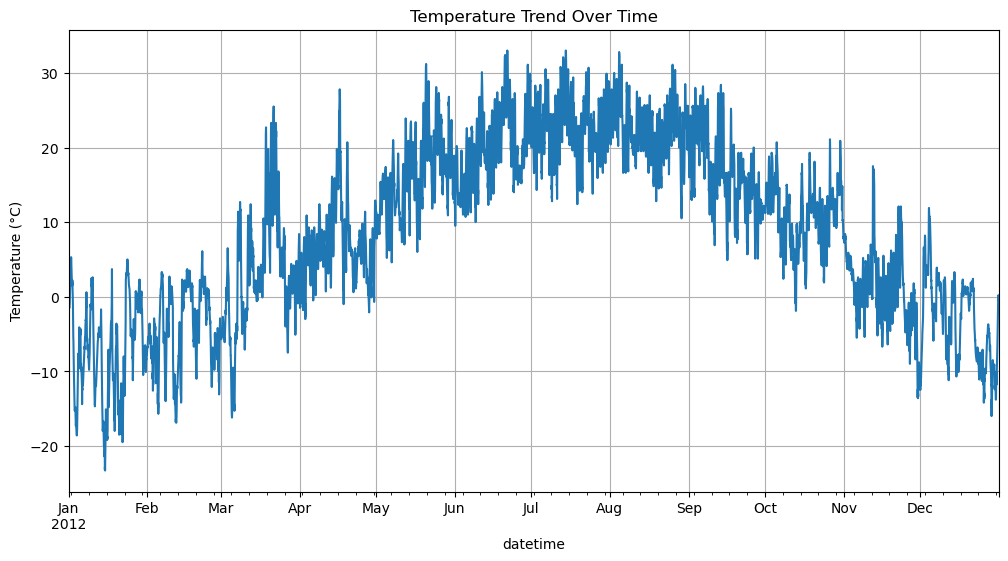

In [19]:
data['temp_c'].plot(figsize=(12, 6))
plt.xlabel('datetime')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trend Over Time')
plt.grid(True)
plt.show()

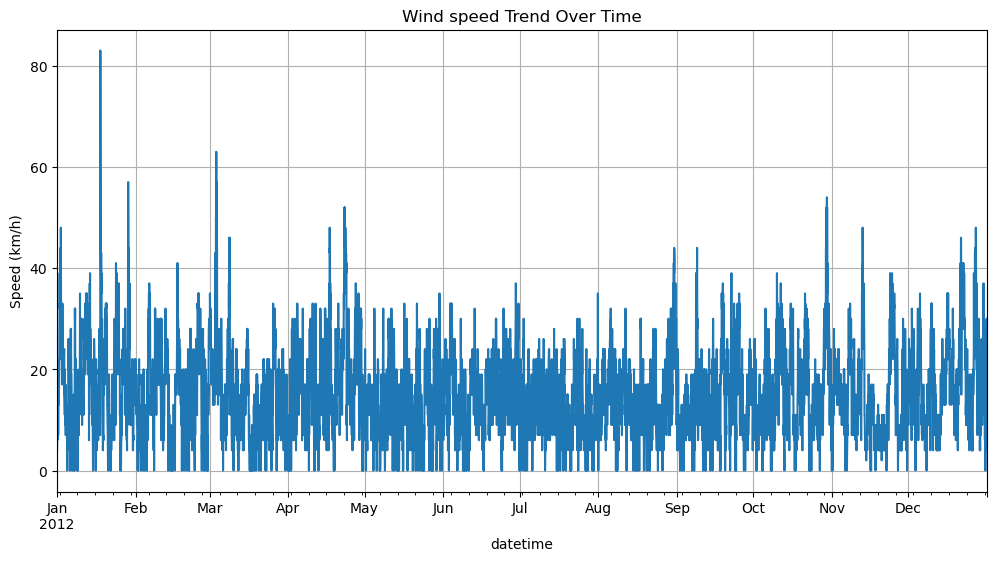

In [20]:
data['wind_speed_km/h'].plot(figsize=(12, 6))
plt.xlabel('datetime')
plt.ylabel('Speed (km/h)')
plt.title('Wind speed Trend Over Time')
plt.grid(True)
plt.show()

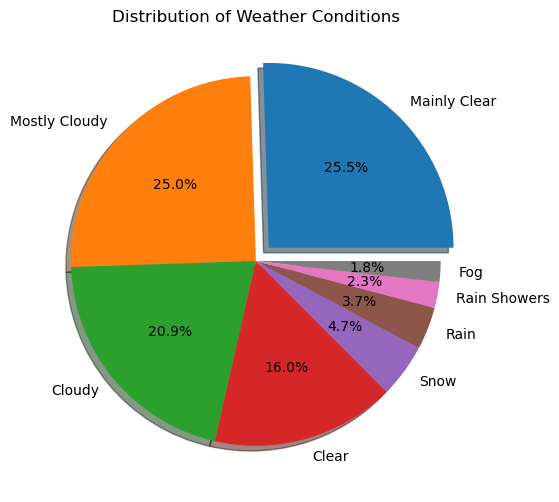

In [48]:
weather_counts = data['weather'].value_counts().head(8)


weather_counts.plot(kind='pie',autopct='%1.1f%%', explode=explode,figsize=(10, 6),shadow=True)
plt.title('Distribution of Weather Conditions')
plt.ylabel('')
plt.show()



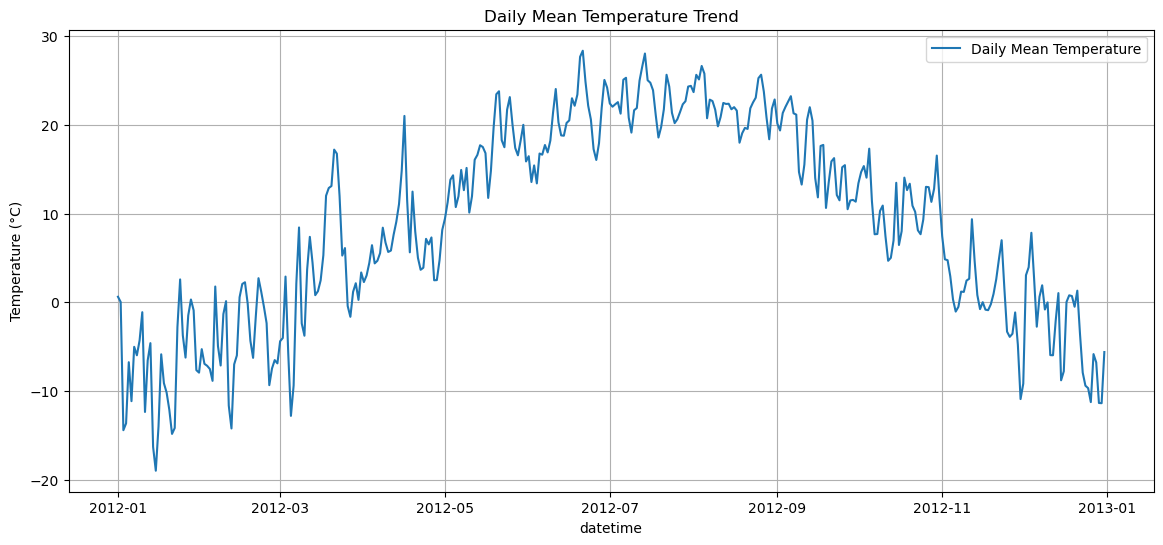

In [50]:
daily_temp = data['temp_c'].resample('D').mean()

plt.figure(figsize=(14, 6))
plt.plot(daily_temp, label='Daily Mean Temperature')
plt.xlabel('datetime')
plt.ylabel('Temperature (°C)')
plt.title('Daily Mean Temperature Trend')
plt.legend()
plt.grid(True)
plt.show()

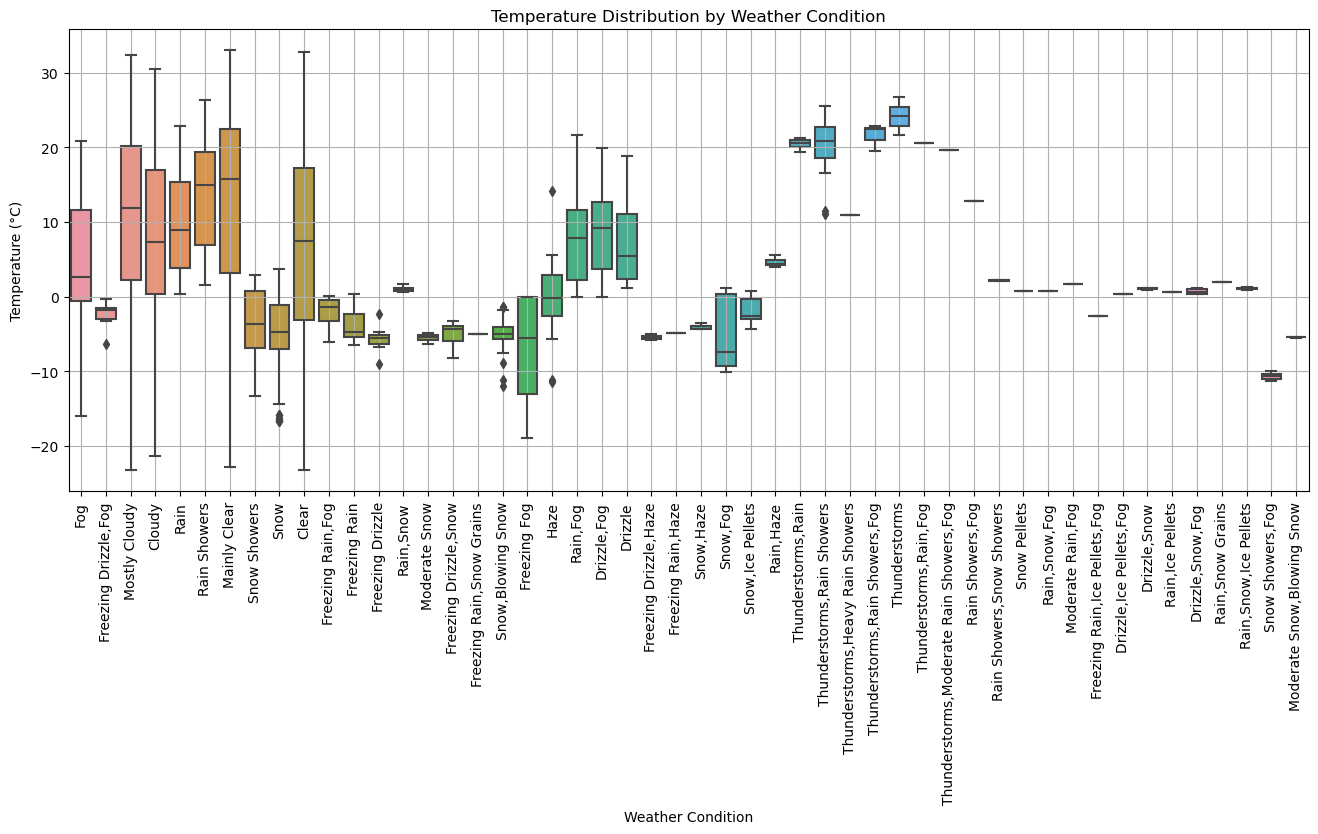

In [51]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='weather', y='temp_c', data=data)
plt.xticks(rotation=90)
plt.xlabel('Weather Condition')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Distribution by Weather Condition')
plt.grid(True)
plt.show()

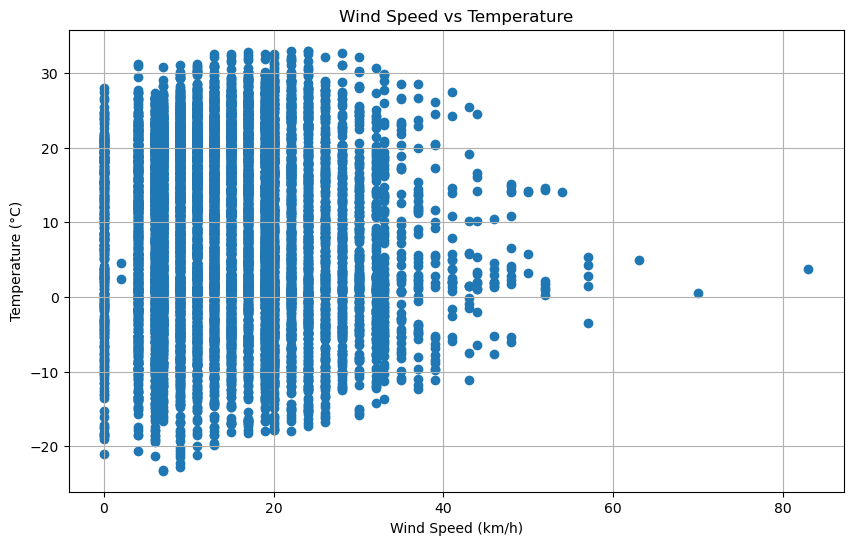

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(data['wind_speed_km/h'], data['temp_c'])
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Temperature (°C)')
plt.title('Wind Speed vs Temperature')
plt.grid(True)
plt.show()

In [54]:
data.head(2)

,temp_c,dew_point_temp_c,rel_hum_%,wind_speed_km/h,visibility_km,press_kpa,weather
datetime,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog


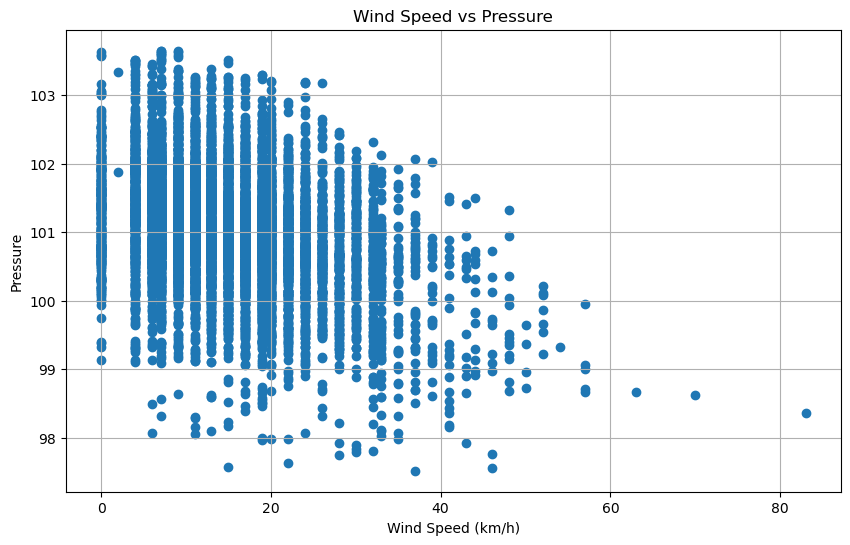

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(data['wind_speed_km/h'], data['press_kpa'])
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Pressure')
plt.title('Wind Speed vs Pressure')
plt.grid(True)
plt.show()

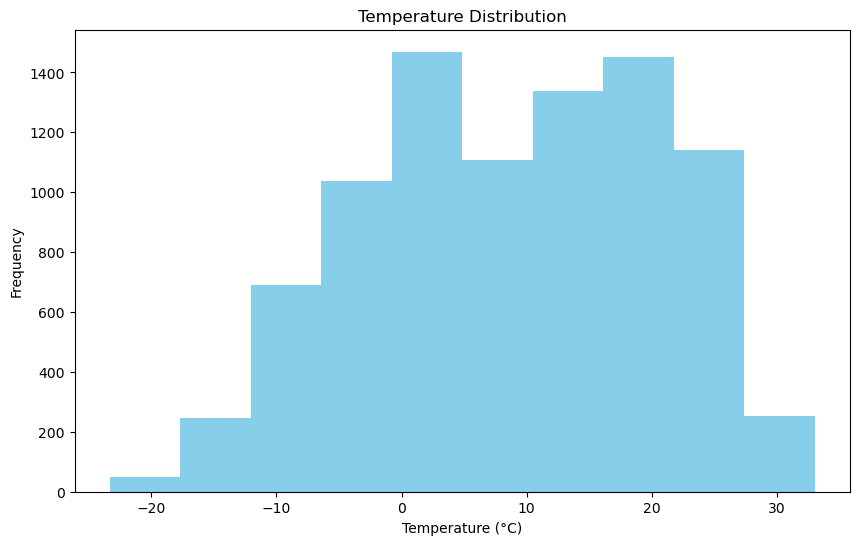

In [87]:
data['temp_c'].plot(kind='hist',  figsize=(10, 6), color='skyblue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.show()

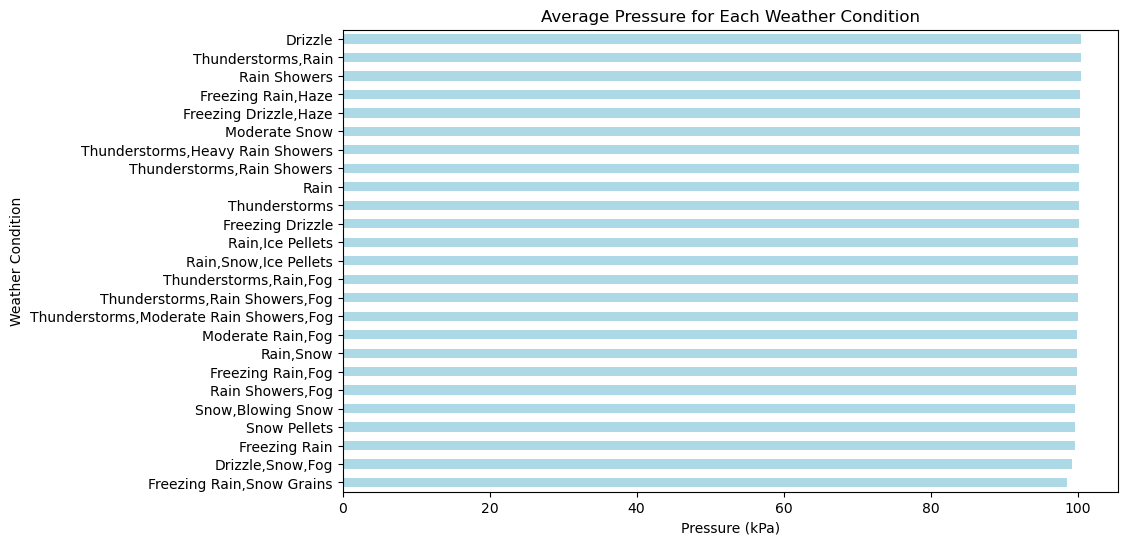

In [86]:
pressure_weather = data.groupby('weather')['press_kpa'].mean().sort_values().head(25)

pressure_weather.plot(kind='barh', figsize=(10, 6), color='lightblue')
plt.title('Average Pressure for Each Weather Condition')
plt.xlabel('Pressure (kPa)')
plt.ylabel('Weather Condition')
plt.show()